# 世界の最新の感染者数

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
del df["Lat"]
del df["Long"]

In [3]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861
1,NaN,Albania,0,0,0,0,0,0,0,0,...,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813
4,NaN,Angola,0,0,0,0,0,0,0,0,...,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705


In [4]:
latest_date = df.tail(1).columns[-1]
latest_date

'6/13/21'

In [5]:
latest_column_key = df.columns[-1]
latest_column_key2 = df.columns[-2]
df = df[['Province/State','Country/Region',latest_column_key2,latest_column_key]]
df = df.rename(columns={latest_column_key:"latest_confirmed"})
df = df.rename(columns={latest_column_key2:"latest_confirmed2"})
df["new_confirmed"] = df.latest_confirmed - df.latest_confirmed2
df.head()

,Province/State,Country/Region,latest_confirmed2,latest_confirmed,new_confirmed
0,NaN,Afghanistan,88740,89861,1121
1,NaN,Albania,132449,132459,10
2,NaN,Algeria,133070,133388,318
3,NaN,Andorra,13813,13813,0
4,NaN,Angola,36600,36705,105


## 全世界の最新の感染者数

In [6]:
print("全世界感染者数({}時点):{:,}人".format(latest_date,df["latest_confirmed"].sum()))
print("全世界感染者数平均({}時点):{:,}人".format(latest_date,df["latest_confirmed"].mean()))
print("全世界の新規感染者数({}時点):{:,}人".format(latest_date,df["new_confirmed"].sum()))
print("全世界の新規感染者数平均({}時点):{:,}人".format(latest_date,df["new_confirmed"].mean()))


全世界感染者数(6/13/21時点):175,960,479人
全世界感染者数平均(6/13/21時点):637,537.9673913043人
全世界の新規感染者数(6/13/21時点):302,255人
全世界の新規感染者数平均(6/13/21時点):1,095.126811594203人


## 国別の最新の感染者数

In [7]:
country = df.groupby(["Country/Region"],as_index=False).sum("latest_confirmed")
country = country.sort_values("latest_confirmed", ascending=False)

In [8]:
country.head()

,Country/Region,latest_confirmed2,latest_confirmed,new_confirmed
179,US,33457407,33461982,4575
79,India,29439989,29510410,70421
23,Brazil,17374818,17412766,37948
62,France,5799459,5802314,2855
178,Turkey,5325435,5330447,5012


In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


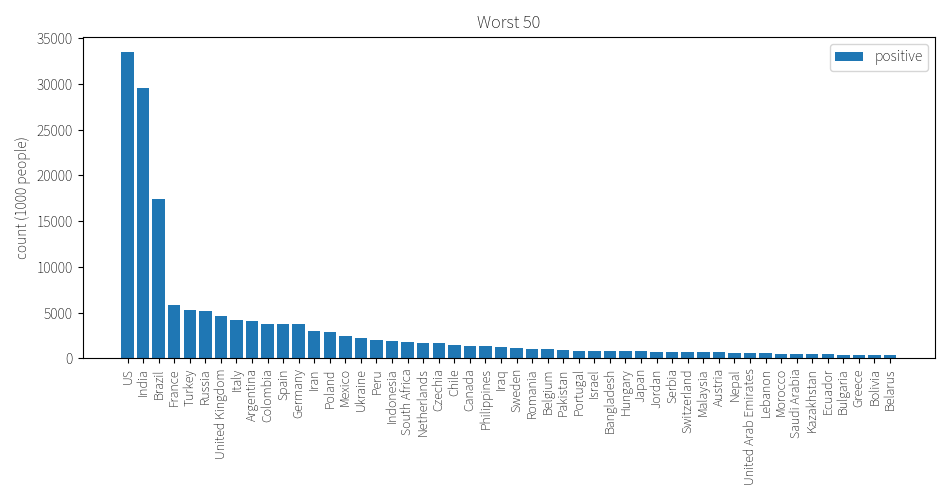

In [10]:
plt.figure(figsize=(9.5,5))
plt.title("Worst 50")
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("count (1000 people)")
#fig.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.bar(country.head(50)["Country/Region"],country.head(50)["latest_confirmed"]/1000,label="positive")
plt.legend()
plt.tight_layout()

## ヒストグラム 

<IPython.core.display.Javascript object>


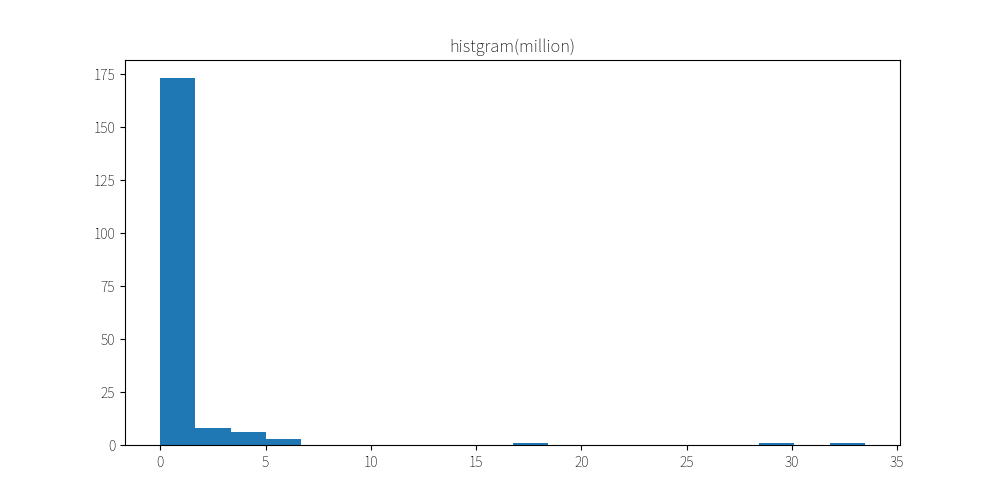

(array([173.,   8.,   6.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([1.00000000e-06, 1.67310005e+00, 3.34619910e+00, 5.01929815e+00,
        6.69239720e+00, 8.36549625e+00, 1.00385953e+01, 1.17116944e+01,
        1.33847934e+01, 1.50578924e+01, 1.67309915e+01, 1.84040906e+01,
        2.00771896e+01, 2.17502887e+01, 2.34233877e+01, 2.50964868e+01,
        2.67695858e+01, 2.84426849e+01, 3.01157839e+01, 3.17888830e+01,
        3.34619820e+01]),
 <a list of 20 Patch objects>)

In [11]:
plt.figure(figsize=(10,5))
plt.title("histgram(million)")
#plt.xticks(rotation="90",fontsize=9)
#plt.ylabel("count (1000 people)")
#fig.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(country["latest_confirmed"]/1000000,bins=20)

## 人口当たりの分析

In [12]:
pop = pd.read_excel("world-data/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx",header=16)
pop.head(1)

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Estimates,WORLD,NaN,900,World,0,2536431.018,2584034.227,2630861.69,...,7041194.168,7125827.957,7210582.041,7295290.759,7379796.967,7464021.934,7547858.9,7631091.113,7713468.205,7794798.729


In [13]:
pop.iloc[:,-1]

0      7794798.729
1              ...
2      1273304.261
3      6521494.468
4      1057438.163
          ...     
284         62.273
285      37742.157
286         56.772
287          5.795
288     331002.647
Name: 2020, Length: 289, dtype: object

In [14]:
pop_latest = pop.loc[pop["Type"]=="Country/Area"][[pop.columns[2],pop.columns[-1]]]

In [15]:
pop_latest.columns = ["country","population"]

In [16]:
pop_latest.head()

,country,population
26,Burundi,11890.781
27,Comoros,869.595
28,Djibouti,988.002
29,Eritrea,3546.427
30,Ethiopia,114963.583


In [17]:
country.head()

,Country/Region,latest_confirmed2,latest_confirmed,new_confirmed
179,US,33457407,33461982,4575
79,India,29439989,29510410,70421
23,Brazil,17374818,17412766,37948
62,France,5799459,5802314,2855
178,Turkey,5325435,5330447,5012


### 世界全体での人口10万人あたり陽性者数

In [18]:
country.latest_confirmed.sum()

175960479

In [19]:
pop_latest.population.sum()

7794798.729

In [20]:
print("****世界全体での人口10万人あたり陽性者数:{}****".format(country.latest_confirmed.sum() / (pop_latest.population.sum() / 100)))

****世界全体での人口10万人あたり陽性者数:2257.4088840209743****


### 各国の人口１０万人あたり陽性者数

In [21]:
c_merged = pd.merge(country, pop_latest, left_on="Country/Region", right_on="country", how="left")
c_merged.loc[c_merged["country"].isna()]

,Country/Region,latest_confirmed2,latest_confirmed,new_confirmed,country,population
0,US,33457407,33461982,4575,NaN,NaN
5,Russia,5133938,5148499,14561,NaN,NaN
12,Iran,3020522,3028717,8195,NaN,NaN
48,Bolivia,405347,406954,1607,NaN,NaN
60,West Bank and Gaza,311018,311534,516,NaN,NaN
70,Moldova,255758,255797,39,NaN,NaN
71,Venezuela,250309,251686,1377,NaN,NaN
84,"Korea, South",147874,148273,399,NaN,NaN
85,Burma,145230,145603,373,NaN,NaN
93,Kosovo,107125,107170,45,NaN,NaN


In [22]:
p_merged = pd.merge(pop_latest, country, left_on="country", right_on="Country/Region", how="left")
len(p_merged.loc[p_merged["Country/Region"].isna()])

64

In [23]:
pop_latest.loc[pop_latest["country"].str.contains("Syria")]

,country,population
104,Syrian Arab Republic,17500.657


In [24]:
renames = {
    "US":"United States of America",
    "Russia":"Russian Federation",
    "Iran":"Iran (Islamic Republic of)",
    "Bolivia":"Bolivia (Plurinational State of)",
    "Moldova":"Republic of Moldova",
    "Venezuela":"Venezuela (Bolivarian Republic of)",
    "Korea, South":"Republic of Korea",
    "Congo (Kinshasa)":"Democratic Republic of the Congo",
    "Congo (Brazzaville)":"Congo",
    "Vietnam":"Viet Nam",
    "Laos":"Lao People's Democratic Republic",
    "Taiwan*":"China, Taiwan Province of China",
    "Tanzania":"United Republic of Tanzania",
    "Brunei":"Brunei Darussalam",
    "Micronesia":"Micronesia (Fed. States of)",
    "Syria":"Syrian Arab Republic",
}

In [25]:
country_renamed = country.copy()
country_renamed["Country/Region"].replace(renames,inplace=True)

In [26]:
c_merged = pd.merge(country_renamed, pop_latest, left_on="Country/Region", right_on="country", how="left")
c_merged.loc[c_merged["country"].isna()]

,Country/Region,latest_confirmed2,latest_confirmed,new_confirmed,country,population
60,West Bank and Gaza,311018,311534,516,NaN,NaN
85,Burma,145230,145603,373,NaN,NaN
93,Kosovo,107125,107170,45,NaN,NaN
112,Cote d'Ivoire,47662,47662,0,NaN,NaN
179,Diamond Princess,712,712,0,NaN,NaN
187,MS Zaandam,9,9,0,NaN,NaN


In [27]:
c_merged["positives per 1000 population"] = c_merged["latest_confirmed"] / (c_merged["population"])
c_merged["positives per 100,000 population"] = (c_merged["latest_confirmed"] / (c_merged["population"]/100)).astype(float)
c_merged["new positives per 100,000 population"] = (c_merged["new_confirmed"] / (c_merged["population"]/100)).astype(float)

In [28]:
c_merged = c_merged.sort_values("positives per 1000 population", ascending=False)

In [29]:
c_merged.loc[c_merged["Country/Region"]=="United States of America"]

,Country/Region,latest_confirmed2,latest_confirmed,new_confirmed,country,population,positives per 1000 population,"positives per 100,000 population","new positives per 100,000 population"
0,United States of America,33457407,33461982,4575,United States of America,331002.647,101.092793,10109.279277,1.382164


<IPython.core.display.Javascript object>


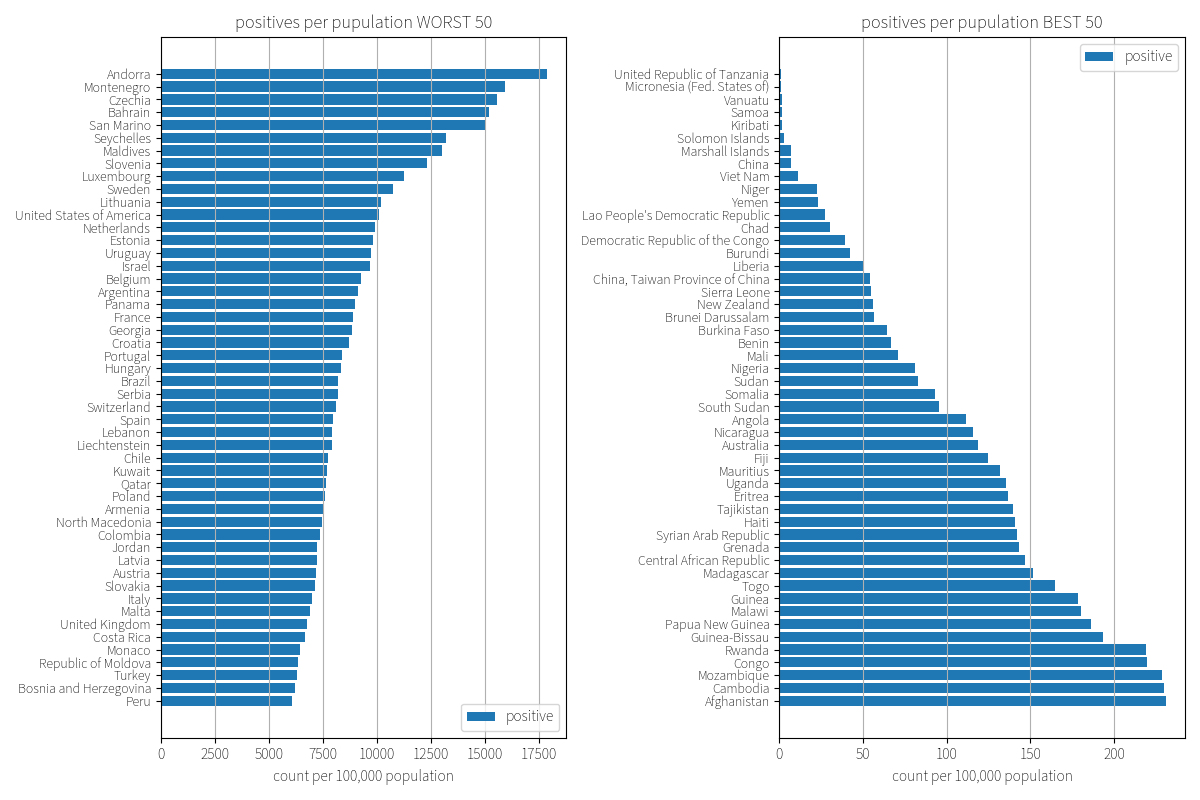

In [30]:
fig = plt.figure(figsize=(12,8))

plt.subplot(1,2,1) # (rows, columns, panel number)
plt.title("positives per pupulation WORST 50")
#plt.xticks(rotation="90",fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel("count per 100,000 population")
plt.grid(axis="x")
#fig.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#plt.bar(c_merged.head(50)["Country/Region"],c_merged.head(50)["positives per 100,000 population"],label="positive")
chart_data=c_merged.head(50).sort_values("positives per 100,000 population",ascending=True)
plt.barh(chart_data["Country/Region"],chart_data["positives per 100,000 population"],label="positive")
#plt.text(0,chart_data["positives per 100,000 population"],chart_data["population"].astype(str))
#plt.text(0,chart_data["positives per 100,000 population"].all(),chart_data["population"].astype(str).all())
plt.legend()

plt.subplot(1,2,2) # (rows, columns, panel number)
plt.title("positives per pupulation BEST 50")
#plt.xticks(rotation="90",fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel("count per 100,000 population")
plt.grid(axis="x")
#fig.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
c_asc = c_merged.sort_values("positives per 1000 population")
chart_data=c_asc.head(50).sort_values("positives per 100,000 population",ascending=False)
plt.barh(chart_data["Country/Region"],chart_data["positives per 100,000 population"],label="positive")
plt.legend()

fig.tight_layout()


In [31]:
fig.savefig("out/covid-global-tops.png")

<IPython.core.display.Javascript object>


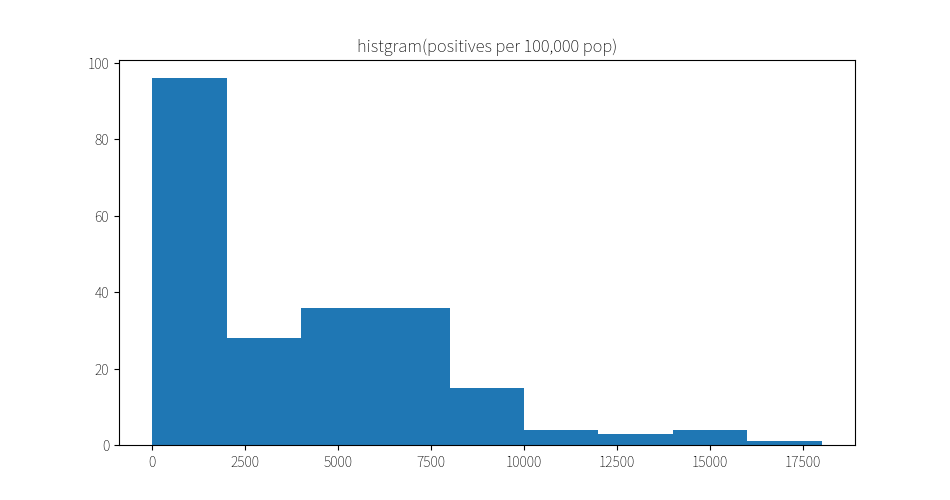

(array([96., 28., 36., 15.,  4.,  3.,  4.,  1.]),
 array([    0,  2000,  4000,  8000, 10000, 12000, 14000, 16000, 18000]),
 <a list of 8 Patch objects>)

In [32]:
plt.figure(figsize=(9.5,5))
plt.title("histgram(positives per 100,000 pop)")
plt.hist(c_merged["positives per 100,000 population"],bins=[0,2000,4000,8000,10000,12000,14000,16000,18000])

In [33]:
c_merged.describe()

,latest_confirmed2,latest_confirmed,new_confirmed,"positives per 100,000 population","new positives per 100,000 population"
count,1.930000e+02,1.930000e+02,193.000000,187.000000,187.000000
mean,9.101462e+05,9.117123e+05,1566.088083,3484.348082,5.671391
std,3.522272e+06,3.526795e+06,6347.061299,4007.259623,12.543461
min,1.000000e+00,1.000000e+00,0.000000,0.852108,0.000000
25%,1.212100e+04,1.212100e+04,0.000000,224.270526,0.000000
50%,9.992800e+04,9.995600e+04,57.000000,1903.454276,0.719912
75%,4.053470e+05,4.069540e+05,715.000000,6330.671438,4.893272
max,3.345741e+07,3.346198e+07,70421.000000,17877.434802,86.456370


In [34]:
c_merged.head()

,Country/Region,latest_confirmed2,latest_confirmed,new_confirmed,country,population,positives per 1000 population,"positives per 100,000 population","new positives per 100,000 population"
137,Andorra,13813,13813,0,Andorra,77.265,178.774348,17877.434802,0.000000
96,Montenegro,99928,99956,28,Montenegro,628.062,159.149893,15914.989284,4.458159
20,Czechia,1665022,1665097,75,Czechia,10708.982,155.486021,15548.602099,0.700347
68,Bahrain,257852,258731,879,Bahrain,1701.583,152.053118,15205.311760,51.657780
160,San Marino,5090,5090,0,San Marino,33.938,149.979374,14997.937415,0.000000


In [35]:
c_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 137 to 187
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country/Region                        193 non-null    object 
 1   latest_confirmed2                     193 non-null    int64  
 2   latest_confirmed                      193 non-null    int64  
 3   new_confirmed                         193 non-null    int64  
 4   country                               187 non-null    object 
 5   population                            187 non-null    object 
 6   positives per 1000 population         187 non-null    object 
 7   positives per 100,000 population      187 non-null    float64
 8   new positives per 100,000 population  187 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 15.1+ KB


<IPython.core.display.Javascript object>


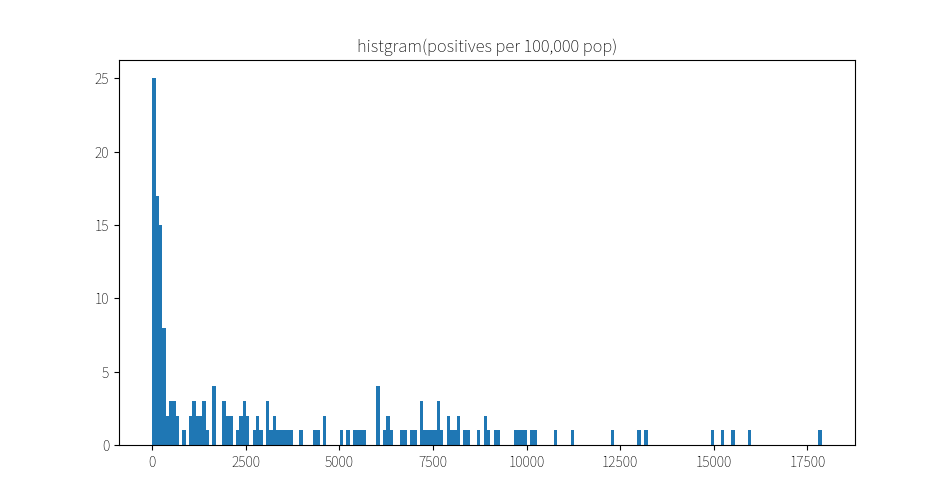

/home/masaru/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/masaru/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([25., 17., 15.,  8.,  2.,  3.,  3.,  2.,  0.,  1.,  0.,  2.,  3.,
         2.,  2.,  3.,  1.,  0.,  4.,  0.,  0.,  3.,  2.,  2.,  0.,  1.,
         2.,  3.,  2.,  0.,  1.,  2.,  1.,  0.,  3.,  1.,  2.,  1.,  1.,
         1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  2.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,
         0.,  0.,  4.,  0.,  1.,  2.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,
         1.,  0.,  3.,  1.,  1.,  1.,  1.,  3.,  1.,  0.,  2.,  1.,  1.,
         2.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  2.,  1.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.

In [36]:
plt.figure(figsize=(9.5,5))
plt.title("histgram(positives per 100,000 pop)")
plt.hist(c_merged["positives per 100,000 population"],bins=200)

## 新規感染者数

<IPython.core.display.Javascript object>


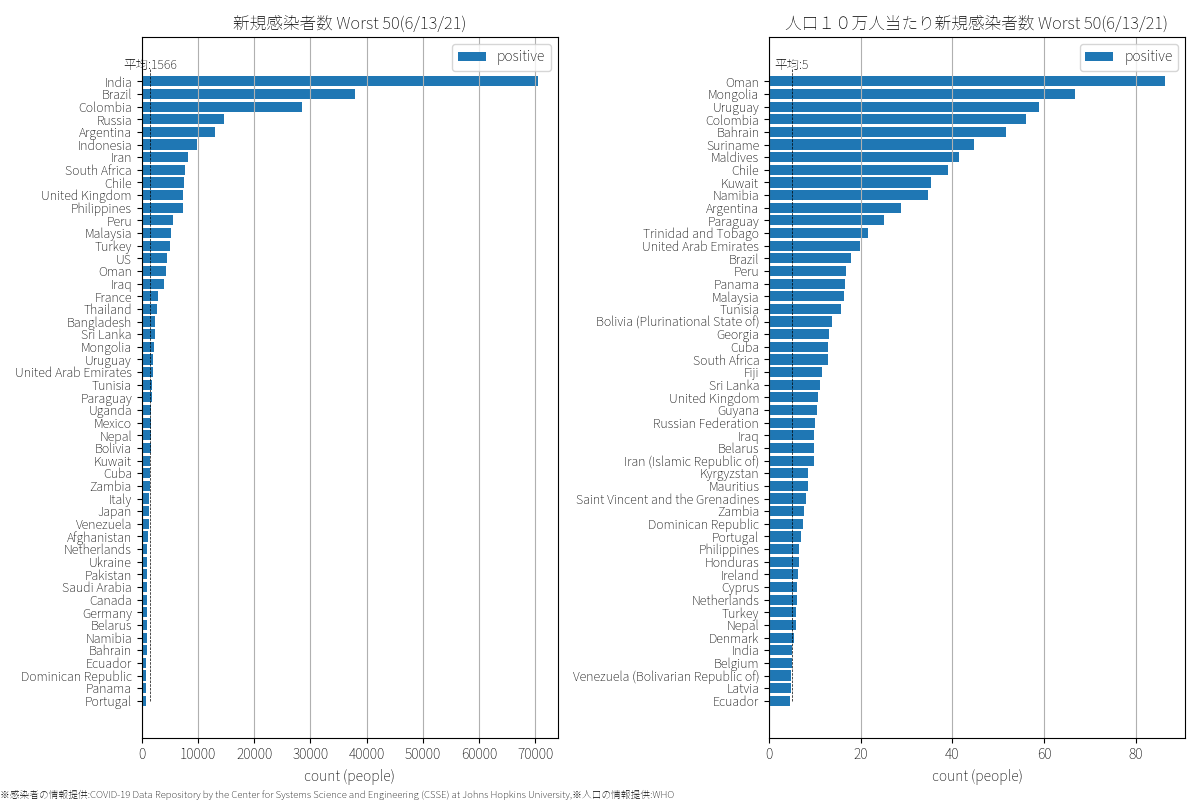

In [37]:
fig = plt.figure(figsize=(12,8))

plt.subplot(1,2,1) # (rows, columns, panel number)
plt.title("新規感染者数 Worst 50({})".format(latest_date))
plt.yticks(fontsize=9)
plt.xlabel("count (people)")
chart_data = country.sort_values("new_confirmed",ascending=False).head(50).sort_values("new_confirmed",ascending=True)
plt.barh(chart_data["Country/Region"],chart_data["new_confirmed"],label="positive")
plt.grid(axis="x")
mean = int(country.new_confirmed.mean())
plt.plot([mean,mean],[0,50], 'k--', lw=0.5)
plt.text(mean,50,"平均:{}".format(mean),ha="center",fontsize=9)
plt.legend()

plt.subplot(1,2,2) # (rows, columns, panel number)
plt.title("人口１０万人当たり新規感染者数 Worst 50({})".format(latest_date))
plt.yticks(fontsize=9)
plt.xlabel("count (people)")
chart_data = c_merged.sort_values("new positives per 100,000 population",ascending=False).head(50).sort_values("new positives per 100,000 population",ascending=True)
plt.barh(chart_data["Country/Region"],chart_data["new positives per 100,000 population"],label="positive")
plt.grid(axis="x")
mean = int(c_merged["new positives per 100,000 population"].mean())
plt.plot([mean,mean],[0,50], 'k--', lw=0.5)
plt.text(mean,50,"平均:{}".format(mean),ha="center",fontsize=9)
plt.legend()

fig.text(0,0
         ,"※感染者の情報提供:COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,"\
         +"※人口の情報提供:WHO",
        fontsize=7,ha="left",va="bottom")
#fig.text(1,0.0,"※人口の情報提供:WHO",fontsize=8,ha="right")

fig.tight_layout()

In [38]:
fig.savefig("out/covid-global-new-positives-latest-top.png")

### WORST50

In [39]:
country.sort_values("new_confirmed",ascending=False).head(50).reset_index()


,index,Country/Region,latest_confirmed2,latest_confirmed,new_confirmed
0,79,India,29439989,29510410,70421
1,23,Brazil,17374818,17412766,37948
2,37,Colombia,3724705,3753224,28519
3,143,Russia,5133938,5148499,14561
4,6,Argentina,4111147,4124190,13043
5,80,Indonesia,1901490,1911358,9868
6,81,Iran,3020522,3028717,8195
7,161,South Africa,1739425,1747082,7657
8,35,Chile,1468992,1476473,7481
9,183,United Kingdom,4574445,4581779,7334
